![image](https://analyticsindiamag.com/wp-content/uploads/2020/04/Screenshot-2020-04-15-at-10.08.12-AM.png)

## Business Problem Understanding

- According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths.

- This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status.

- Each row in the data provides relavant information about the patient.

## Attribute Information
- 1) id: unique identifier
- 2) gender: "Male", "Female" or "Other"
- 3) age: age of the patient
- 4) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
- 5) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
- 6) ever_married: "No" or "Yes"
- 7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
- 8) Residence_type: "Rural" or "Urban"
- 9) avg_glucose_level: average glucose level in blood
- 10) bmi: body mass index
- 11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
- 12) stroke: 1 if the patient had a stroke or 0 if not

*Note: "Unknown" in smoking_status means that the information is unavailable for this patient



## Data Collection/Data Import

**The dataset is available at this google drive link:**
**Use gdown to download this in the colab environment directly.**

!gdown https://drive.google.com/uc?id=1vs0cmeKYeht_d07C1HvHFUIxD-IfEACL


In [1]:
## write your code here


## Importing Necessary libraries

In [2]:
import os
import gdown
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Importing Data From CSV File Using Pandas

In [3]:
## write your code here
file_path = "stroke_data.csv"
df = pd.read_csv(file_path)

## Data Understanding:

### Print the first five rows of the pandas dataframe

In [4]:
## write your code here
df.head()

,id,gender,age,height_in_m,weight_in_kg,avg_glucose_level,bmi,smoking_status,hypertension,heart_disease,ever_married,work_type,Residence_type,stroke
0,9046,Male,67.0,1.82880,122.409046,169.35,36.6,formerly smoked,0,1,Yes,Private,Urban,1
1,51676,Female,61.0,1.64592,NaN,169.35,NaN,never smoked,0,0,Yes,Self-employed,Rural,1
2,31112,Male,80.0,1.79832,105.103532,105.92,32.5,never smoked,0,1,Yes,Private,Rural,1
3,60182,Female,49.0,1.92024,126.843865,169.35,34.4,smokes,0,0,Yes,Private,Urban,1
4,1665,female,79.0,1.85928,82.966131,169.35,24.0,never smoked,1,0,Yes,Self-employed,Rural,1


## Print the last five rows of the pandas dataframe

In [5]:
## write your code here
df.tail()

,id,gender,age,height_in_m,weight_in_kg,avg_glucose_level,bmi,smoking_status,hypertension,heart_disease,ever_married,work_type,Residence_type,stroke
5130,46373,Female,57.0,1.67640,72.506178,169.97,25.8,never smoked,0,0,Yes,Private,Rural,0
5131,40112,Female,37.0,1.92024,92.551774,118.41,25.1,never smoked,0,0,No,Private,Urban,0
5132,32240,Female,27.0,1.82880,139.131593,93.55,41.6,never smoked,0,0,No,Private,Urban,0
5133,69312,Female,48.0,1.58496,78.377464,99.29,31.2,never smoked,0,0,Yes,Self-employed,Urban,0
5134,25763,Female,23.0,1.64592,76.666190,98.66,28.3,Unknown,0,0,No,Private,Urban,0


## What is the shape of the dataset?

In [6]:
## write your code here
df.shape

(5135, 14)

## What are the name of the columns in the dataframe?

In [7]:
## write your code here
df.columns

Index(['id', 'gender', 'age', 'height_in_m', 'weight_in_kg',
       'avg_glucose_level', 'bmi', 'smoking_status', 'hypertension',
       'heart_disease', 'ever_married', 'work_type', 'Residence_type',
       'stroke'],
      dtype='object')

### What are the datatypes of each feature in the dataset?

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5135 entries, 0 to 5134
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5135 non-null   int64  
 1   gender             5135 non-null   object 
 2   age                5135 non-null   float64
 3   height_in_m        5135 non-null   float64
 4   weight_in_kg       4934 non-null   float64
 5   avg_glucose_level  5135 non-null   float64
 6   bmi                4934 non-null   float64
 7   smoking_status     5135 non-null   object 
 8   hypertension       5135 non-null   int64  
 9   heart_disease      5135 non-null   int64  
 10  ever_married       4933 non-null   object 
 11  work_type          5135 non-null   object 
 12  Residence_type     5135 non-null   object 
 13  stroke             5135 non-null   int64  
dtypes: float64(5), int64(4), object(5)
memory usage: 561.8+ KB


In [9]:
## write your code here
df.dtypes

id                     int64
gender                object
age                  float64
height_in_m          float64
weight_in_kg         float64
avg_glucose_level    float64
bmi                  float64
smoking_status        object
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
stroke                 int64
dtype: object

## Descriptive Statistics

Descriptive statistics involve a set of summary measures that provide a snapshot of the dataset's characteristics. These measures help us understand the distribution, central tendency, and variability within the data.

- Mean: The average value of the data.
- Median: The middle value when the data is sorted.
- Mode: The most frequently occurring value.
- Range: The difference between the maximum and minimum values.
- Standard Deviation: A more interpretable measure of data spread.
These statistics provide a preliminary understanding of the dataset, which is valuable for subsequent analysis and decision-making.



### How to see the descriptive statistics of a dataset?

In [10]:
## write your code here?
df.describe()

,id,age,height_in_m,weight_in_kg,avg_glucose_level,bmi,hypertension,heart_disease,stroke
count,5135.000000,5135.000000,5135.000000,4934.000000,5135.000000,4934.000000,5135.000000,5135.000000,5135.000000
mean,36510.305940,43.237390,1.751992,89.172256,101.383180,28.899959,0.097176,0.053944,0.048491
std,21153.824243,22.601553,0.132236,27.910274,34.605155,7.847094,0.296226,0.225928,0.214822
min,67.000000,0.080000,1.524000,32.516064,55.120000,10.300000,0.000000,0.000000,0.000000
25%,17757.000000,25.000000,1.645920,69.416594,77.285000,23.500000,0.000000,0.000000,0.000000
50%,36896.000000,45.000000,1.737360,85.357641,91.850000,28.100000,0.000000,0.000000,0.000000
75%,54631.500000,61.000000,1.859280,104.671347,113.985000,33.100000,0.000000,0.000000,0.000000
max,72940.000000,82.000000,1.981200,348.548423,271.740000,97.600000,1.000000,1.000000,1.000000


## How to select gender column from the pandas dataframe?

In [11]:
## write your code here
df['gender']

0         Male
1       Female
2         Male
3       Female
4       female
         ...  
5130    Female
5131    Female
5132    Female
5133    Female
5134    Female
Name: gender, Length: 5135, dtype: object

### How to select multiple columns : age, gender and bmi?

In [12]:
## write your code here
df[['age','gender','bmi']]

,age,gender,bmi
0,67.0,Male,36.6
1,61.0,Female,NaN
2,80.0,Male,32.5
3,49.0,Female,34.4
4,79.0,female,24.0
...,...,...,...
5130,57.0,Female,25.8
5131,37.0,Female,25.1
5132,27.0,Female,41.6
5133,48.0,Female,31.2


## How to select the 7th row of the pandas dataframe?


In [13]:
## write your code here
df.iloc[6,:]

id                          53882
gender                       Male
age                          74.0
height_in_m               1.88976
weight_in_kg            97.850684
avg_glucose_level           70.09
bmi                          27.4
smoking_status       never smoked
hypertension                    1
heart_disease                   1
ever_married                  Yes
work_type                 Private
Residence_type              Rural
stroke                          1
Name: 6, dtype: object

## How to select the 4th column from the pandas dataframe?


In [14]:
## write your code here
df.iloc[:,3]

0       1.82880
1       1.64592
2       1.79832
3       1.92024
4       1.85928
         ...   
5130    1.67640
5131    1.92024
5132    1.82880
5133    1.58496
5134    1.64592
Name: height_in_m, Length: 5135, dtype: float64

## How to select 20th to 30th row and 3rd to 7th column in pandas dataframe?

In [15]:
## write your code here
df.iloc[19:30,2:7]

,age,height_in_m,weight_in_kg,avg_glucose_level,bmi
19,57.0,1.85928,NaN,169.35,NaN
20,71.0,1.85928,77.435055,169.35,22.4
21,52.0,1.95072,186.079587,169.35,48.9
22,79.0,1.55448,64.276455,169.35,26.6
23,82.0,1.55448,78.533262,169.35,32.5
24,71.0,1.92024,100.295149,102.87,27.2
25,80.0,1.95072,89.424750,104.12,23.5
26,65.0,1.88976,100.707639,100.98,28.2
27,58.0,1.64592,NaN,169.35,NaN
28,69.0,1.88976,101.064758,169.35,28.3


## How to select 3rd and 100th row & 4th and 10th column in a pandas dataframe?

In [16]:
## write your code here
df.iloc[[2,100],[3,9]]

,height_in_m,heart_disease
2,1.79832,1
100,1.73736,1


## Select only those rows with gender 'Male'

In [17]:
## write your code here
df.loc[df['gender']=="Male"]

,id,gender,age,height_in_m,weight_in_kg,avg_glucose_level,bmi,smoking_status,hypertension,heart_disease,ever_married,work_type,Residence_type,stroke
0,9046,Male,67.0,1.82880,122.409046,169.35,36.6,formerly smoked,0,1,Yes,Private,Urban,1
2,31112,Male,80.0,1.79832,105.103532,105.92,32.5,never smoked,0,1,Yes,Private,Rural,1
5,56669,Male,81.0,1.79832,93.784690,169.35,29.0,formerly smoked,0,0,Yes,Private,Urban,1
6,53882,Male,74.0,1.88976,97.850684,70.09,27.4,never smoked,1,1,Yes,Private,Rural,1
13,8213,Male,78.0,1.52400,NaN,169.35,NaN,Unknown,0,1,Yes,Private,Urban,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5119,26242,Male,6.0,1.55448,48.328161,83.28,20.0,Unknown,0,0,NaN,children,Urban,0
5121,20973,Male,45.0,1.73736,114.398109,86.99,37.9,never smoked,0,0,Yes,Govt_job,Rural,0
5122,62793,Male,37.0,1.95072,95.893775,79.56,25.2,never smoked,0,0,Yes,Private,Urban,0
5125,64520,Male,68.0,1.61544,106.473573,91.68,40.8,Unknown,0,0,Yes,Self-employed,Urban,0


## Select all those rows which have avg_glucose_level greater than 100 and columns gender, age, bmi and avg_glucose_level

In [18]:
## write your code here
df.loc[df['avg_glucose_level']>100, ['gender', 'age', 'bmi', 'avg_glucose_level']]

,gender,age,bmi,avg_glucose_level
0,Male,67.0,36.6,169.35
1,Female,61.0,NaN,169.35
2,Male,80.0,32.5,105.92
3,Female,49.0,34.4,169.35
4,female,79.0,24.0,169.35
...,...,...,...,...
5110,Female,39.0,26.6,102.51
5123,Female,18.0,23.2,112.33
5126,Female,36.0,23.2,100.33
5130,Female,57.0,25.8,169.97


## Select all those Females who are greater than 50 years old?

In [19]:
## write your code here
df.loc[(df['gender']=='Female') & (df['age']> 50)]

,id,gender,age,height_in_m,weight_in_kg,avg_glucose_level,bmi,smoking_status,hypertension,heart_disease,ever_married,work_type,Residence_type,stroke
1,51676,Female,61.0,1.64592,NaN,169.35,NaN,never smoked,0,0,Yes,Self-employed,Rural,1
7,10434,Female,69.0,1.61544,59.499938,94.39,22.8,never smoked,0,0,No,Private,Urban,1
8,27419,Female,59.0,1.85928,NaN,76.15,NaN,Unknown,0,0,Yes,Private,Rural,1
9,60491,Female,78.0,1.98120,94.988713,58.57,24.2,Unknown,0,0,Yes,Private,Urban,1
10,12109,Female,81.0,1.95072,113.017663,80.43,29.7,never smoked,1,0,Yes,Private,Rural,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5106,44873,Female,81.0,1.88976,142.847714,125.20,40.0,never smoked,0,0,Yes,Self-employed,Urban,0
5115,9160,Female,80.0,1.73736,78.478914,90.77,26.0,never smoked,1,0,Yes,Private,Urban,0
5124,27705,Female,82.0,1.79832,105.103532,88.60,32.5,Unknown,0,1,Yes,Self-employed,Rural,0
5127,23989,Female,62.0,1.73736,98.400484,86.40,32.6,smokes,0,0,Yes,Self-employed,Urban,0


In [20]:
# Find those females who smokes
df.loc[(df['gender']=="Female") & (df['smoking_status']=="smokes")]

,id,gender,age,height_in_m,weight_in_kg,avg_glucose_level,bmi,smoking_status,hypertension,heart_disease,ever_married,work_type,Residence_type,stroke
3,60182,Female,49.0,1.92024,126.843865,169.35,34.4,smokes,0,0,Yes,Private,Urban,1
11,12095,Female,61.0,1.64592,99.693137,120.46,36.8,smokes,0,1,Yes,Govt_job,Rural,1
12,12175,Female,54.0,1.88976,97.493565,104.51,27.3,smokes,0,0,Yes,Private,Urban,1
20,70630,Female,71.0,1.85928,77.435055,169.35,22.4,smokes,0,0,Yes,Govt_job,Rural,1
49,36338,Female,39.0,1.85928,135.511347,58.09,39.2,smokes,1,0,Yes,Private,Rural,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5082,24552,Female,44.0,1.70688,109.253975,72.03,37.5,smokes,0,0,Yes,Private,Rural,0
5093,32235,Female,45.0,1.58496,NaN,95.02,NaN,smokes,1,0,Yes,Govt_job,Rural,0
5110,26605,Female,39.0,1.61544,69.416594,102.51,26.6,smokes,0,0,Yes,Private,Rural,0
5117,23633,Female,37.0,1.82880,140.803847,83.65,42.1,smokes,0,0,Yes,Private,Rural,0


## Data Wrangling

- Data Inspection
  - Checking Duplicate Enties
  - Checking Missing Values
  - Checking standard format
  - Checking data entry typos and errors
- Data Cleaning
  - Removing Duplicates
  - Handling Missing Values
  - Standardizing Formats
  - Correcting Errors
- Data Transformation
  - Feature Engineering
  - Normalization/Scaling
  - One-Hot Encoding
- Data Integration
- Data Reduction
- Data Formatting
- Data Enrichment
- Data Validation
- Documentation
- Exploratory Data Analysis (EDA)


### Checking Duplicate Entries
- Check if duplicate entries are present or not.
- If present find how many of duplicate entries are there?

In [21]:
## write your code here
df[df.duplicated()]

,id,gender,age,height_in_m,weight_in_kg,avg_glucose_level,bmi,smoking_status,hypertension,heart_disease,ever_married,work_type,Residence_type,stroke
5110,26605,Female,39.0,1.61544,69.416594,102.51,26.6,smokes,0,0,Yes,Private,Rural,0
5111,5236,Female,49.0,1.73736,99.607852,73.48,33.0,never smoked,0,0,Yes,Private,Rural,0
5112,11709,Male,71.0,1.55448,76.116854,95.08,31.5,never smoked,0,0,No,Private,Urban,0
5113,53695,Male,70.0,1.95072,103.504392,81.59,27.2,never smoked,0,0,Yes,Govt_job,Urban,0
5114,68596,Female,19.0,1.85928,97.485204,58.39,28.2,never smoked,0,0,No,Private,Urban,0
5115,9160,Female,80.0,1.73736,78.478914,90.77,26.0,never smoked,1,0,Yes,Private,Urban,0
5116,26474,Female,44.0,1.67640,93.021491,97.16,33.1,Unknown,0,0,Yes,Govt_job,Urban,0
5117,23633,Female,37.0,1.82880,140.803847,83.65,42.1,smokes,0,0,Yes,Private,Rural,0
5118,53998,Female,21.0,1.64592,84.793348,58.66,31.3,never smoked,0,0,No,Private,Urban,0
5119,26242,Male,6.0,1.55448,48.328161,83.28,20.0,Unknown,0,0,NaN,children,Urban,0


In [22]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
5130     True
5131     True
5132     True
5133     True
5134     True
Length: 5135, dtype: bool

In [23]:
## write your code here
df[~df.duplicated()]

,id,gender,age,height_in_m,weight_in_kg,avg_glucose_level,bmi,smoking_status,hypertension,heart_disease,ever_married,work_type,Residence_type,stroke
0,9046,Male,67.0,1.82880,122.409046,169.35,36.6,formerly smoked,0,1,Yes,Private,Urban,1
1,51676,Female,61.0,1.64592,NaN,169.35,NaN,never smoked,0,0,Yes,Self-employed,Rural,1
2,31112,Male,80.0,1.79832,105.103532,105.92,32.5,never smoked,0,1,Yes,Private,Rural,1
3,60182,Female,49.0,1.92024,126.843865,169.35,34.4,smokes,0,0,Yes,Private,Urban,1
4,1665,female,79.0,1.85928,82.966131,169.35,24.0,never smoked,1,0,Yes,Self-employed,Rural,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1.73736,NaN,83.75,NaN,never smoked,1,0,Yes,Private,Urban,0
5106,44873,Female,81.0,1.88976,142.847714,125.20,40.0,never smoked,0,0,Yes,Self-employed,Urban,0
5107,19723,Female,35.0,1.82880,102.341989,82.99,30.6,never smoked,0,0,Yes,Self-employed,Rural,0
5108,37544,Male,51.0,1.82880,85.619442,166.29,25.6,formerly smoked,0,0,Yes,Private,Rural,0


## Remove Duplicate Entries

- Remove all those rows which has duplicate entries

In [24]:
## write your code here
df= df[~df.duplicated()]
print(df.shape)

(5110, 14)


In [25]:
## write your code here


## Checking Missing Values
- Find missing values (NAN) values in the datasets
- Find columns which has missing values with their frequency

In [26]:
## write your code here
df.isnull()

,id,gender,age,height_in_m,weight_in_kg,avg_glucose_level,bmi,smoking_status,hypertension,heart_disease,ever_married,work_type,Residence_type,stroke
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,True,False,True,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,False,False,False,False,True,False,True,False,False,False,False,False,False,False
5106,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5107,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5108,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [27]:
df[df.isnull()]

,id,gender,age,height_in_m,weight_in_kg,avg_glucose_level,bmi,smoking_status,hypertension,heart_disease,ever_married,work_type,Residence_type,stroke
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5106,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5107,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5108,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
df.isnull().sum()

id                     0
gender                 0
age                    0
height_in_m            0
weight_in_kg         201
avg_glucose_level      0
bmi                  201
smoking_status         0
hypertension           0
heart_disease          0
ever_married         201
work_type              0
Residence_type         0
stroke                 0
dtype: int64

## Visualize missing values using heatmaps

<Axes: >

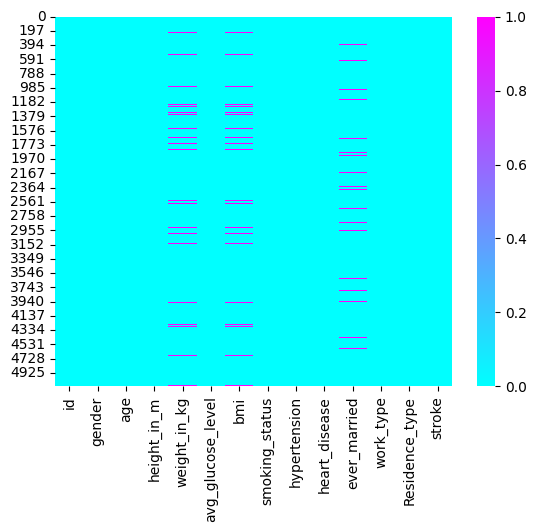

In [29]:
## write your code here
sns.heatmap(df.isnull(), cmap='cool')

## Handling Missing Values

- Handle missing values for ever_married column, avg_glucose_level and weight_in_kg column

In [30]:
## write your code here
df.loc[df['weight_in_kg'].isnull()]


,id,gender,age,height_in_m,weight_in_kg,avg_glucose_level,bmi,smoking_status,hypertension,heart_disease,ever_married,work_type,Residence_type,stroke
1,51676,Female,61.0,1.64592,NaN,169.35,NaN,never smoked,0,0,Yes,Self-employed,Rural,1
8,27419,Female,59.0,1.85928,NaN,76.15,NaN,Unknown,0,0,Yes,Private,Rural,1
13,8213,Male,78.0,1.52400,NaN,169.35,NaN,Unknown,0,1,Yes,Private,Urban,1
19,25226,Male,57.0,1.85928,NaN,169.35,NaN,Unknown,0,1,No,Govt_job,Urban,1
27,61843,Male,58.0,1.64592,NaN,169.35,NaN,Unknown,0,0,Yes,Private,Rural,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5039,42007,Male,41.0,1.70688,NaN,70.15,NaN,formerly smoked,0,0,No,Private,Rural,0
5048,28788,Male,40.0,1.73736,NaN,169.35,NaN,smokes,0,0,Yes,Private,Urban,0
5093,32235,Female,45.0,1.58496,NaN,95.02,NaN,smokes,1,0,Yes,Govt_job,Rural,0
5099,7293,Male,40.0,1.73736,NaN,83.94,NaN,smokes,0,0,Yes,Private,Rural,0


In [31]:
## write your code here

clean_df = df.loc[~df['weight_in_kg'].isnull()]
clean_df.shape

(4909, 14)

In [32]:
## write your code here
clean_df.isnull().sum()

id                     0
gender                 0
age                    0
height_in_m            0
weight_in_kg           0
avg_glucose_level      0
bmi                    0
smoking_status         0
hypertension           0
heart_disease          0
ever_married         196
work_type              0
Residence_type         0
stroke                 0
dtype: int64

In [33]:
## write your code here

df.loc[df['ever_married'].isnull()]

,id,gender,age,height_in_m,weight_in_kg,avg_glucose_level,bmi,smoking_status,hypertension,heart_disease,ever_married,work_type,Residence_type,stroke
249,30669,Male,3.0,1.64592,48.762948,95.12,18.0,Unknown,0,0,NaN,children,Rural,0
282,33759,Female,3.0,1.55448,38.662529,73.74,16.0,Unknown,0,0,NaN,children,Urban,0
291,11014,Male,4.0,1.85928,69.138442,79.17,20.0,Unknown,0,0,NaN,children,Rural,0
369,8171,Female,4.0,1.76784,51.879287,93.25,16.6,Unknown,0,0,NaN,children,Rural,0
380,31741,Male,4.0,1.95072,63.548652,106.22,16.7,Unknown,0,0,NaN,children,Rural,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4990,21743,Male,4.0,1.85928,61.187521,85.88,17.7,Unknown,0,0,NaN,children,Urban,0
5020,6278,Male,5.0,1.58496,44.212928,97.46,17.6,Unknown,0,0,NaN,children,Urban,0
5050,15581,Male,5.0,1.95072,73.442454,101.87,19.3,Unknown,0,0,NaN,children,Urban,0
5052,31836,Female,6.0,1.98120,86.745891,91.05,22.1,Unknown,0,0,NaN,children,Urban,0


In [34]:
df['ever_married'].value_counts()

ever_married
Yes    3408
No     1501
Name: count, dtype: int64

In [35]:
#If someone is below 18 years old, he/she can not marry someone.
clean_df.loc[clean_df['ever_married'].isnull(), 'ever_married'] = "No"


In [36]:
clean_df.isnull().sum()

id                   0
gender               0
age                  0
height_in_m          0
weight_in_kg         0
avg_glucose_level    0
bmi                  0
smoking_status       0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
stroke               0
dtype: int64

## Checking missing values for weight_in_kg and bmi columns

In [37]:
## write your code here



In [38]:
## write your code here


## Check relationship between bmi and height_in_m whether it can be used to fill missing values in bmi (use scatterplot to visually inspect relationship)


In [39]:
## write your code here


In [40]:
## write your code here


In [41]:
## write your code here


In [42]:
## write your code here


## Exploratory Data Analysis

- Univariate Analysis: Studying one variable at a time
- Bivariate Analysis: Studying two variables at a time
- Multivariate Analysis: Studying multiple variables at a time
- We need to investigate each feature properly

In [43]:
## write your code here


## id feature

In [44]:
## write your code here
df['id'].value_counts()

id
9046     1
22194    1
15104    1
28315    1
56996    1
        ..
897      1
4789     1
5686     1
37451    1
44679    1
Name: count, Length: 5110, dtype: int64

## gender

In [45]:
## write your code here (check dtypes first)
df['gender'].dtypes

dtype('O')

In [46]:
## write your code here
df['gender'].value_counts()

gender
Female    2944
Male      2065
female      50
male        50
Other        1
Name: count, dtype: int64

In [47]:
## write your code here for calculating frequency count of gender column
df['gender'] = df['gender'].str.lower()

In [48]:
df['gender'].value_counts()

gender
female    2994
male      2115
other        1
Name: count, dtype: int64

In [49]:
## write your code here
df = df.loc[df['gender']!='other']

In [50]:
df['gender'].value_counts()

gender
female    2994
male      2115
Name: count, dtype: int64

## Create Piechart Or Bargraph For Univariate Analysis Of Categorical Feature

In [51]:
# univariate analysis (categorical) -> bargraph, piechart
# univariate analysis (numercial) -> distribution plot, kde plot, histogram, boxplot

# bivariate plot (categorical) -> stacked bargraph, grouped bargrpah
# bivariate plot(numerical) -> scatterplot, kdeplot, pairplot(multivariate)
# 3d plot, tensorboard embedding projector

In [52]:
## write your code here
gender_df = df['gender'].value_counts().reset_index()
gender_df

,gender,count
0,female,2994
1,male,2115


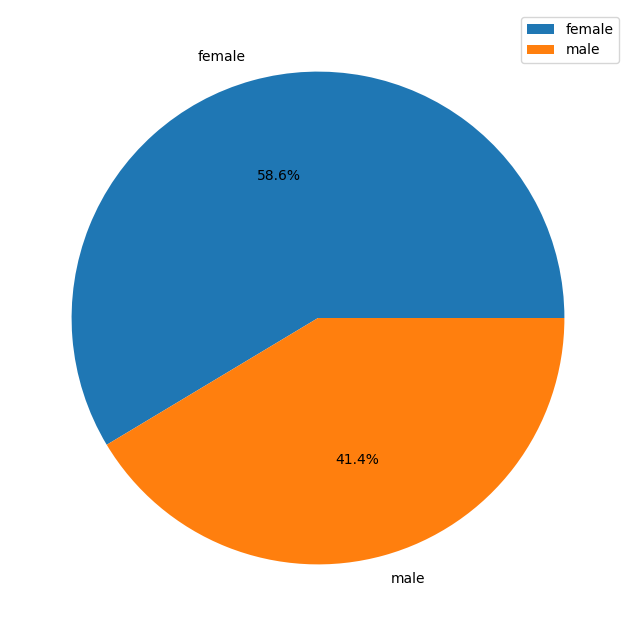

In [53]:
plt.figure(figsize=(12,8))
plt.pie(gender_df['count'], labels = gender_df['gender'],autopct="%.1f%%")
plt.legend()

## smoking status

In [54]:
## write your code here
df['smoking_status'].value_counts()

smoking_status
never smoked       1892
Unknown            1544
formerly smoked     884
smokes              789
Name: count, dtype: int64

In [55]:
## write your code here
clean_df.loc[clean_df['smoking_status'] == "Unknown", "smoking_status"] = "never smoked"

In [56]:
## write your code here
clean_df['smoking_status'].value_counts()

smoking_status
never smoked       3335
formerly smoked     837
smokes              737
Name: count, dtype: int64

In [57]:
## write your code here
smoking_df = clean_df['smoking_status'].value_counts().reset_index()
smoking_df

,smoking_status,count
0,never smoked,3335
1,formerly smoked,837
2,smokes,737


## Plot figure (Barchart)

C:\Users\presh\AppData\Local\Temp\ipykernel_6360\3141581845.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = smoking_df, x = 'smoking_status',


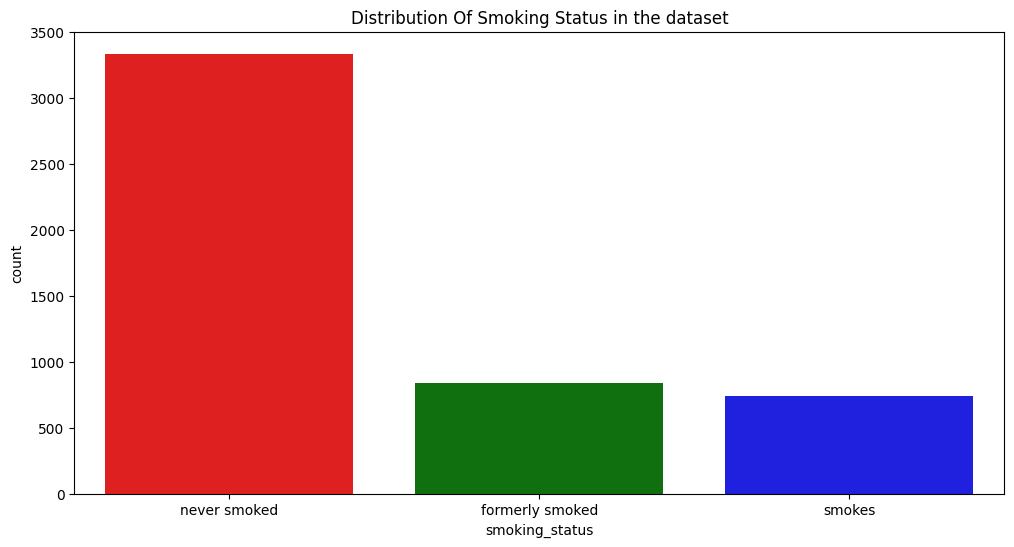

In [58]:
plt.figure(figsize = (12,6))
sns.barplot(data = smoking_df, x = 'smoking_status',
            y = 'count',
            palette = ["red", 'green', 'blue'])
plt.title("Distribution Of Smoking Status in the dataset")
plt.show()

In [59]:
## write your code here (use seaborn)


## hypertension

In [60]:
## write your code here
hypertension_df = clean_df['hypertension'].value_counts().reset_index()
hypertension_df

,hypertension,count
0,0,4458
1,1,451


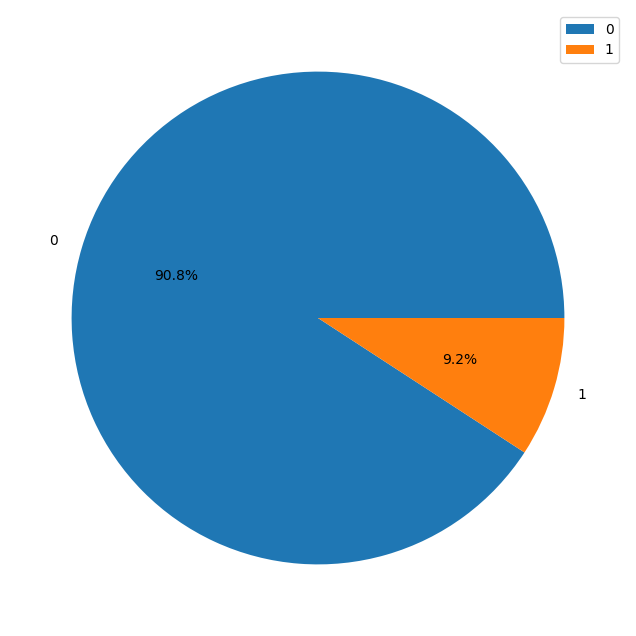

In [61]:
## write your code here (show graph)
plt.figure(figsize=(12,8))
plt.pie(hypertension_df['count'], labels = hypertension_df['hypertension'],autopct="%.1f%%")
plt.legend()

## stroke feature

In [62]:
## write your code here
stroke_df = clean_df['stroke'].value_counts().reset_index()
stroke_df

,stroke,count
0,0,4700
1,1,209


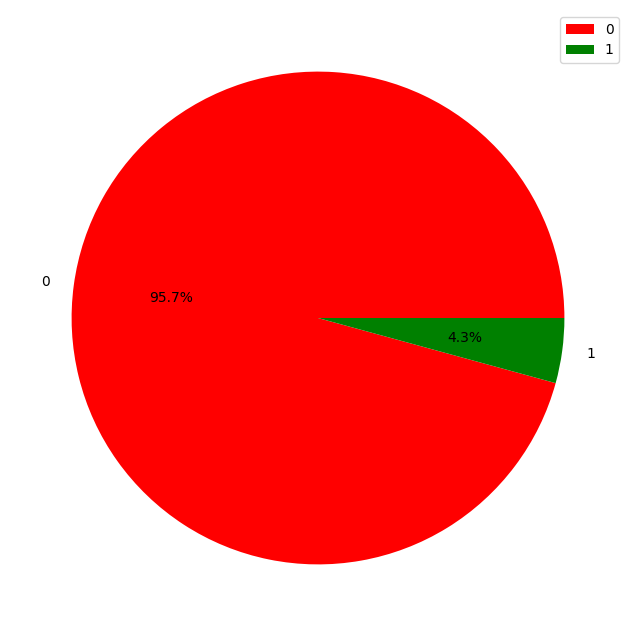

In [63]:
## write your code here(piechart)
plt.figure(figsize = (12, 8))
plt.pie(stroke_df['count'], labels = stroke_df['stroke'],
        colors = ['red', 'green'],
        autopct = "%.1f%%")
plt.legend()

# Bivariate Analysis
## Is there a chance that patients with hypertension has more likely to get a stroke or not? (cross_tab function)

In [64]:
# H0: There is no relationship between hypertension and stroke
# H1: There is a strong relationship between hypertension and stroke

# chisquare test ()

# observe pvalue
# if pvalue < 0.05 -> Accept  alternate hypotheses
# else accept H0

In [65]:
## write your code here
stroke_hypertension_df = pd. crosstab(df['stroke'],df['hypertension'])
stroke_hypertension_df

hypertension,0,1
stroke,,
0,4428,432
1,183,66


## Hypothesis Testing (Chisquare test for Independence)


chi2, p, dof, expected = chi2_contingency(stroke_hypertension_df)

In [66]:
from scipy.stats import chi2_contingency

In [67]:
chi2, p, dof, expected = chi2_contingency(stroke_hypertension_df)
print(dof)
print(p)

1
1.688936253410575e-19


In [68]:
# Result:- There is a strong relation between stroke and hypertension

In [69]:
# Perform Chi-square test



## Group Barplot

In [70]:
## write your code here
stroke_hypertension = clean_df[['stroke', 'hypertension']].value_counts().reset_index()
stroke_hypertension

,stroke,hypertension,count
0,0,0,4309
1,0,1,391
2,1,0,149
3,1,1,60


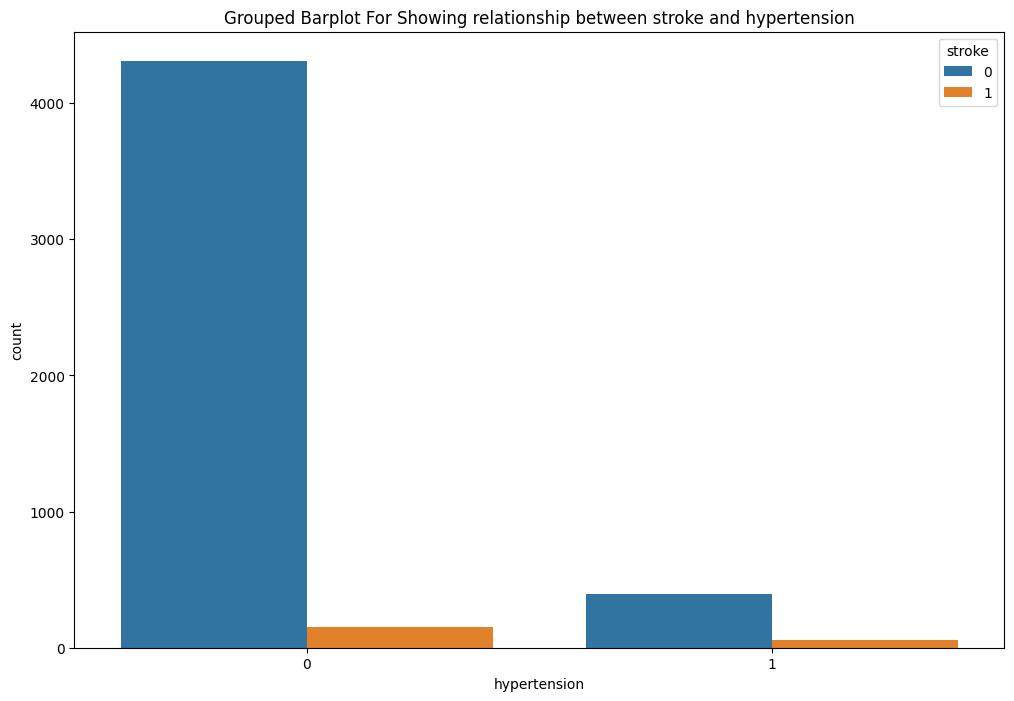

In [71]:
# Plot using Seaborn
plt.figure(figsize = (12, 8))
sns.barplot(data = stroke_hypertension, x = "hypertension",
            y = "count",
            hue = "stroke")
plt.title("Grouped Barplot For Showing relationship between stroke and hypertension")
plt.show()


## heart disease

In [72]:
## write your code here
clean_df['heart_disease'].value_counts()

heart_disease
0    4666
1     243
Name: count, dtype: int64

In [73]:
## write your code here
heart_stroke = pd.crosstab(clean_df['stroke'], clean_df['heart_disease'])
heart_stroke

heart_disease,0,1
stroke,,
0,4497,203
1,169,40


## Hypothesis Testing (Chisquare test for Independence)


In [74]:
# Perform Chi-square test

chi2, p, dof, expected = chi2_contingency(heart_stroke)
print(dof)
print(p)

1
2.0677783295228626e-21


<li>Since, p value < 0.05, there is a strong relationship between heart disease and stroke.</li>

## Group Bar plot

In [75]:
## write your code here with long format table
heart_stroke_df = clean_df[['heart_disease', 'stroke']].value_counts().reset_index()

heart_stroke_df

,heart_disease,stroke,count
0,0,0,4497
1,1,0,203
2,0,1,169
3,1,1,40


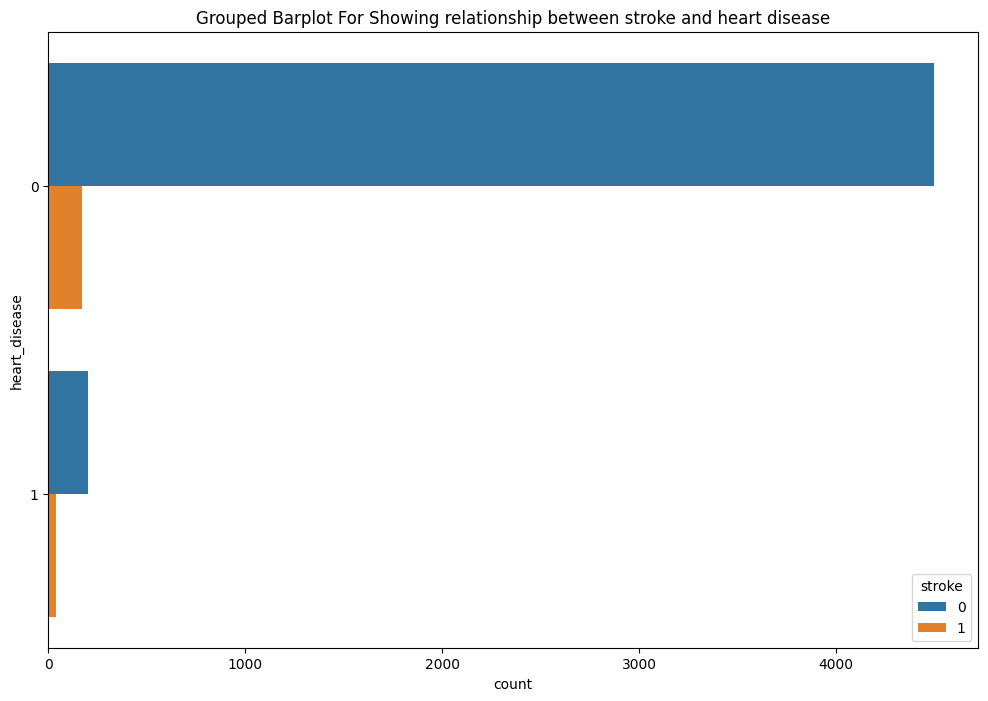

In [76]:
## write your code here
plt.figure(figsize = (12, 8))
sns.barplot(data = heart_stroke_df, x = "count" ,
            y = "heart_disease",
            hue = "stroke", orient = "horizontal")
plt.title("Grouped Barplot For Showing relationship between stroke and heart disease")
plt.show()

## Numerical Features

In [77]:
# select numerical features
## write your code here
clean_df.select_dtypes('number')


,id,age,height_in_m,weight_in_kg,avg_glucose_level,bmi,hypertension,heart_disease,stroke
0,9046,67.0,1.82880,122.409046,169.35,36.6,0,1,1
2,31112,80.0,1.79832,105.103532,105.92,32.5,0,1,1
3,60182,49.0,1.92024,126.843865,169.35,34.4,0,0,1
4,1665,79.0,1.85928,82.966131,169.35,24.0,1,0,1
5,56669,81.0,1.79832,93.784690,169.35,29.0,0,0,1
...,...,...,...,...,...,...,...,...,...
5104,14180,13.0,1.92024,68.584183,103.08,18.6,0,0,0
5106,44873,81.0,1.88976,142.847714,125.20,40.0,0,0,0
5107,19723,35.0,1.82880,102.341989,82.99,30.6,0,0,0
5108,37544,51.0,1.82880,85.619442,166.29,25.6,0,0,0


## age column

(array([422., 356., 431., 470., 576., 564., 668., 529., 376., 517.]),
 array([8.0000e-02, 8.2720e+00, 1.6464e+01, 2.4656e+01, 3.2848e+01,
        4.1040e+01, 4.9232e+01, 5.7424e+01, 6.5616e+01, 7.3808e+01,
        8.2000e+01]),
 <BarContainer object of 10 artists>)

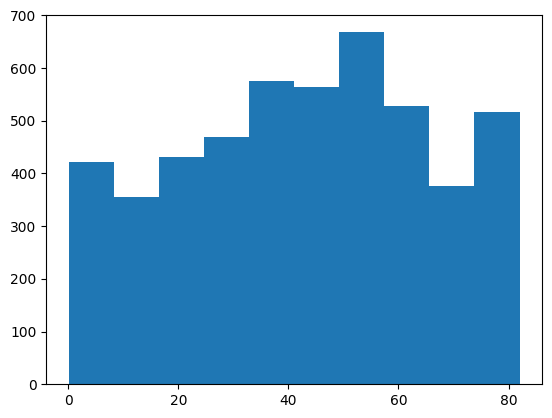

In [87]:
## write your code here (for histogram)
plt.hist(clean_df['age'])

<Axes: xlabel='age', ylabel='Count'>

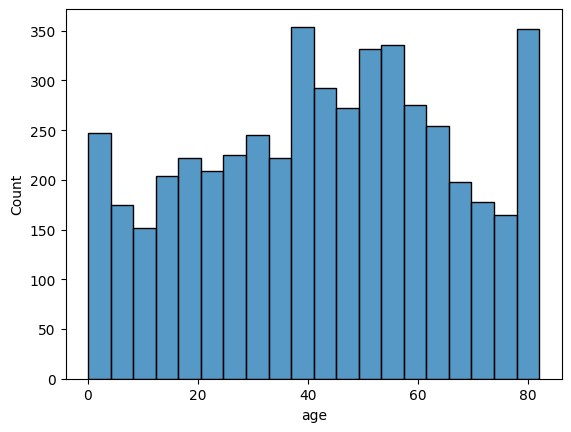

In [88]:
sns.histplot(clean_df['age'])

<Axes: xlabel='age', ylabel='Density'>

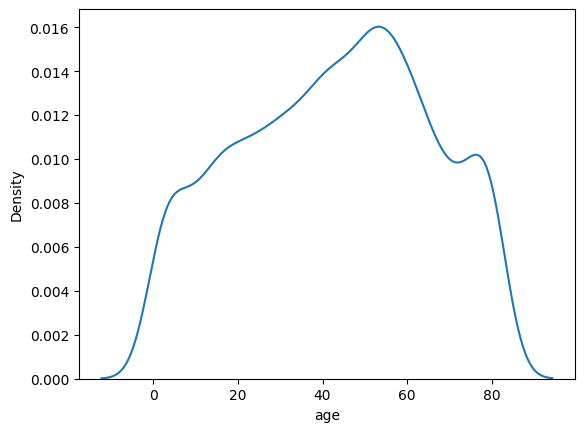

In [89]:
## write your code here (for kde plot)
sns.kdeplot(clean_df['age'])

<Axes: ylabel='age'>

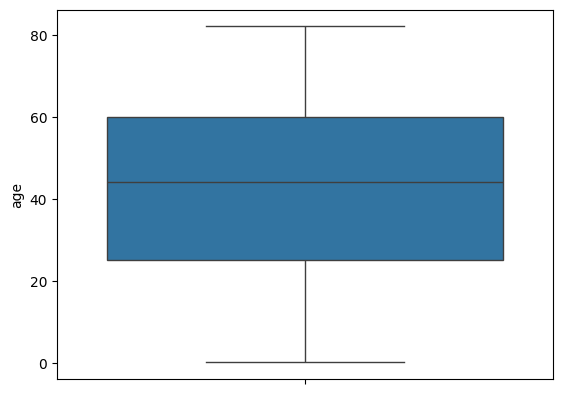

In [92]:
## write your code here (for outlier analysis using boxplot)
sns.boxplot(clean_df['age'])

In [90]:
clean_df['age'].mean()

42.865373803218574

In [91]:
clean_df['age'].median()

44.0

## Bmi column

<Axes: xlabel='bmi', ylabel='Density'>

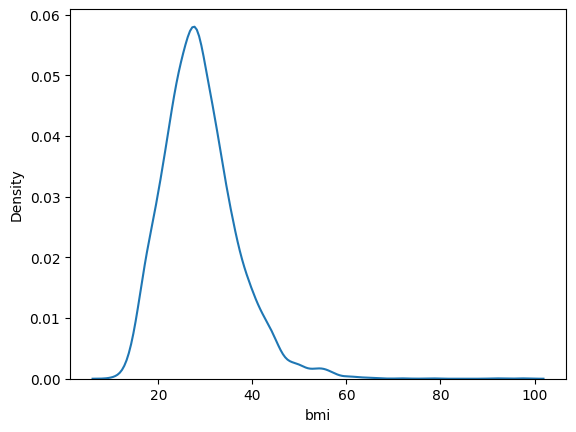

In [93]:
## write your code here (for histogram)
sns.kdeplot(clean_df['bmi'])

In [94]:
## write your code here (for kde plot)
clean_df['bmi'].mean()

28.893236911794663

In [ ]:
clean_df['bmi'].median()

In [83]:
## write your code here (for boxplot outlier analysis)


### Hypothesis Test For Normality


# Perform Kolmogorov-Smirnov test
statistic, pvalue = kstest(final_df['bmi'], 'norm')

# Print the result
print("Kolmogorov-Smirnov Test Statistic:", statistic)

print("p-value:", pvalue)

# Interpret the results
alpha = 0.05  # Significance level

if pvalue > alpha:
    print("Sample looks Gaussian (fail to reject H0)")
    
else:
    print("Sample does not look Gaussian (reject H0)")


In [84]:
from scipy.stats import kstest, shapiro

## Scatterplots

In [85]:
## write your code here


## Correlation Plots and Heatmaps

In [86]:
## write your code here
